In [1]:
import sarddpm_train
from matplotlib import pyplot as plt
import torch
import guideddiffusion.gaussian_diffusion as gd
import guideddiffusion.script_util as su
import numpy as np
import valdata


In [2]:
import cv2

In [3]:
dl = torch.utils.data.DataLoader(valdata.ValDataNew(dataset_path="../DSIFN/val/t1"),
                                 batch_size=1, shuffle=False, num_workers=1) 




In [60]:
for batch_id1, data_var in enumerate(dl):
    clean_batch, model_kwargs = data_var

    speck = model_kwargs['SR']
    clean =model_kwargs["HR"]
    break

In [71]:
def toSave(batch):
    im = ((batch + 1) * 127.5)
    im = im.clamp(0, 255).to(torch.uint8)
    im = im.permute(0, 2, 3, 1)
    im = im.contiguous().cpu().numpy()[0]
    return im

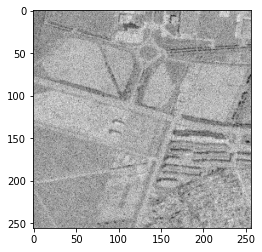

In [77]:
plt.imshow(toSave(model_kwargs['SR']))


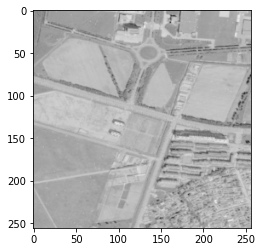

In [75]:
plt.imshow(toSave(model_kwargs["HR"]))

''

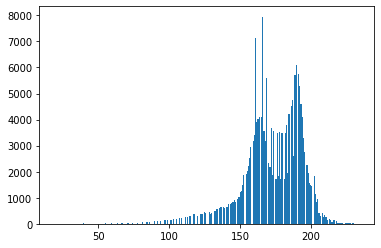

In [81]:
plt.hist(toSave(model_kwargs["HR"]).ravel(), bins = 255)
""

''

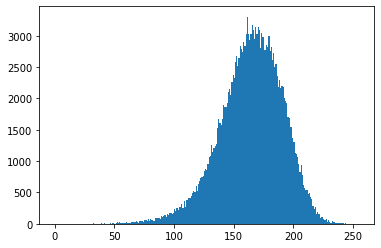

In [70]:
plt.hist(speck2.ravel(), bins = 255)
""

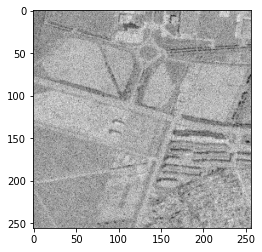

In [65]:
plt.imshow(speck2)

(array([  327., 14397., 15942.,  2274.,  2118.,  3138., 29925., 72090.,
        49284.,  7113.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

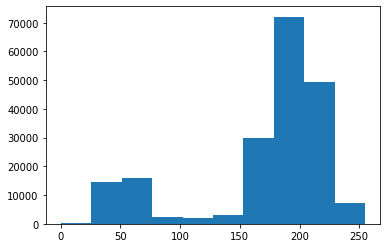

In [59]:
plt.hist(speck2.ravel())

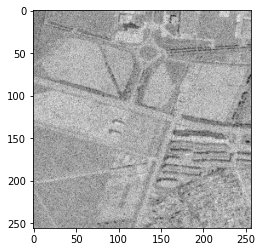

In [5]:
plt.imshow((speck-np.min(speck))/(np.max(speck) - np.min(speck)))

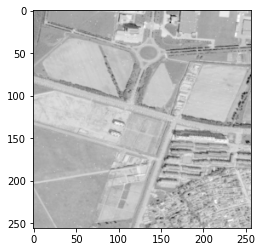

In [6]:
plt.imshow((clean-np.min(clean))/(np.max(clean) - np.min(clean)))

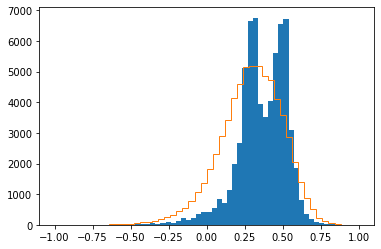

''

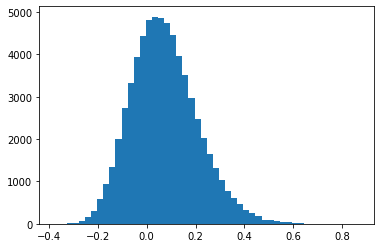

In [7]:
plt.hist(clean[:,:,0].ravel(), bins = 50)
plt.hist(speck[:,:,0].ravel(), bins = 50, histtype = "step")
plt.show()
plt.hist((clean-speck)[:,:,0].ravel(), bins = 50)
""

In [8]:
np.unique(speck)

array([-1.        , -0.93594235, -0.8713143 , ...,  0.9762732 ,
        0.98606193,  1.        ], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


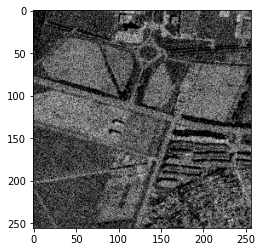

In [9]:
plt.imshow(speck)

''

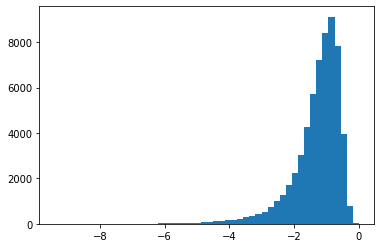

In [10]:
plt.hist(np.array(np.log(speck[:,:,0]+1e-5).ravel()), bins = 50)
""

In [11]:
g = sarddpm_train.load_sar_data("../DSIFN/train/","../DSIFN/train/", 4, 256, 256, False)




In [12]:
batch = next(g)

In [13]:
speck = batch[1]["SR"][1].transpose(0,2)
imCR = batch[1]["HR"][1].transpose(0,2)

In [14]:
m, M = torch.min(speck).item(), torch.max(speck).item()
m,M

(-1.0, 1.0)

In [15]:
noise = np.array(speck-imCR)


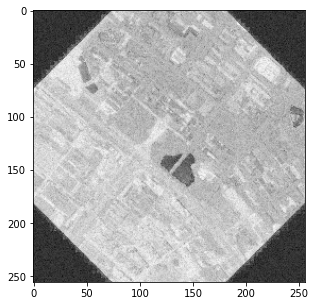

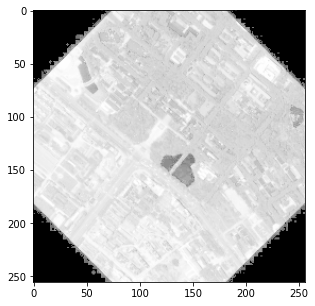

In [16]:
plt.figure(figsize = (5,5))
plt.imshow((speck - torch.min(speck))/(torch.max(speck)-torch.min(speck)) )
plt.show()
plt.figure(figsize = (5,5))
plt.imshow((imCR - torch.min(imCR))/(torch.max(imCR)-torch.min(imCR)) )


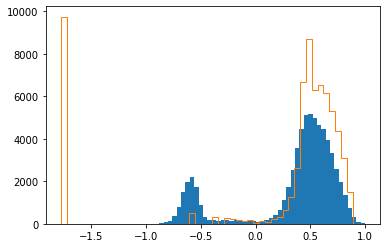

''

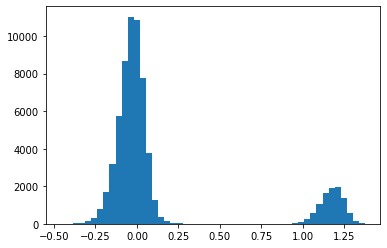

In [17]:
plt.hist(np.array(speck)[:,:,0].ravel(), bins =50)
plt.hist(np.array(imCR)[:,:,0].ravel(), bins = 50, histtype = "step")
plt.show()
plt.hist(np.array(speck - imCR)[:,:,0].ravel(), bins = 50)
""


In [18]:
noise = np.array(speck-imCR)
print(noise.mean(), noise.std())

0.14419475 0.43598855


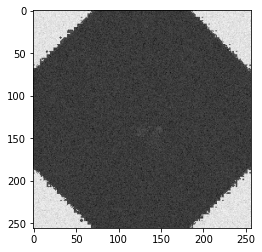

In [19]:
plt.imshow((noise-np.min(noise))/(np.max(noise)-np.min(noise)))

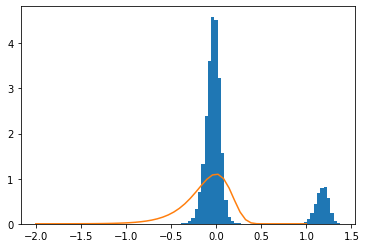

In [20]:
plt.hist(noise.ravel(), bins = 50, density = True)
x = np.linspace(-2,1, 50)
paramX = x*5
plt.plot(x,np.exp(paramX-np.exp(paramX))*3)


In [21]:
myGD = su.create_gaussian_diffusion()

In [22]:
device = torch.device("cpu")

In [23]:
diffused = myGD.q_sample(imCR, torch.tensor(200).to(device))

In [24]:
m,M = torch.min(diffused), torch.max(diffused)

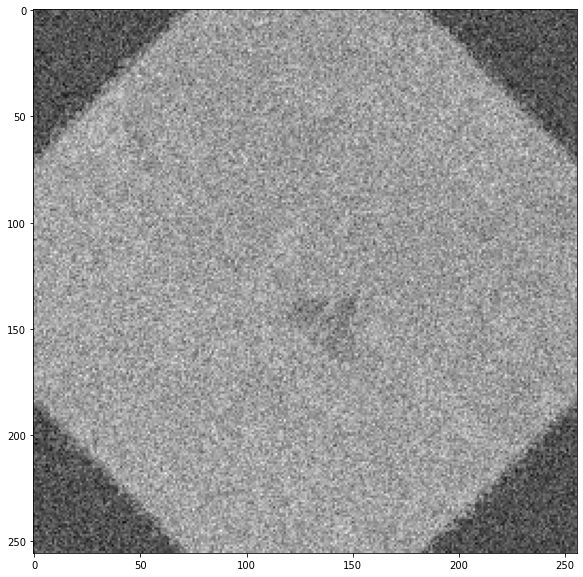

In [25]:
plt.figure(figsize = (10,10))
plt.imshow((diffused-m)/(M-m))

In [26]:
diffNp = diffused[:,:,0].ravel().numpy()

In [27]:
noise =diffNp-imCR.ravel().numpy()[::3]

''

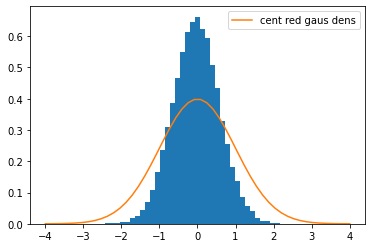

In [28]:
plt.hist(noise,bins =  40, density = True)
x = np.linspace(-4,4, 50)
plt.plot(x,1/(2*np.pi)**.5*np.exp(-x**2/2), label="cent red gaus dens")
plt.legend()
""

In [29]:
noise.mean()

-0.03402923

In [30]:
diffNp.mean()

0.16303916

In [31]:
seed = np.random.RandomState(112311)

''

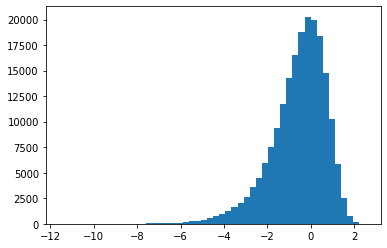

In [32]:
plt.hist(np.log(seed.gamma(1,1,diffused.shape).ravel()), bins = 50)
""


In [33]:
speck[175:220,225:].shape

torch.Size([45, 31, 3])

In [34]:
homoRegion = np.array(speck[175:220,225:])

In [35]:
len(homoRegion[:,:,0].ravel())

1395

In [36]:
from torch.utils.data import DataLoader
from valdata import  ValData, ValDataNew


In [37]:
valData = DataLoader(ValDataNew(dataset_path='../DSIFN/val/t1/'), batch_size=1, shuffle=False, num_workers=1) 

In [82]:
from numba import jit

In [83]:
@jit
def a(d):
    for i in d:
        for j in i:
            print(j)


In [85]:
a([np.array([3,5]),np.array([2,8,9])])

3
5
2
8
9


/usr/local/lib/python3.9/site-packages/numba/core/ir_utils.py:2152: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'd' of function 'a'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-83-80efed527ead>", line 2:
@jit
def a(d):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
